In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data=pd.read_csv("C:/Users/PRATIK DESAI/Downloads/netflix_content_2023.csv")
data

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie
...,...,...,...,...,...,...
24807,We Are Black and British: Season 1,No,NaN,"1,00,000",English,Show
24808,Whitney Cummings: Can I Touch It?,Yes,2019-07-30,"1,00,000",English,Movie
24809,Whitney Cummings: Jokes,No,2022-07-26,"1,00,000",English,Movie
24810,"Whose Vote Counts, Explained: Limited Series",Yes,2020-09-28,"1,00,000",English,Movie


In [3]:
pd.isnull(data).sum()

Title                      0
Available Globally?        0
Release Date           16646
Hours Viewed               0
Language Indicator         0
Content Type               0
dtype: int64

In [4]:
data["Hours Viewed"]=data["Hours Viewed"].replace(",","",regex=True).astype('float')
data.head()



,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie


In [5]:
data.groupby('Content Type').size()

Content Type
Movie    14104
Show     10708
dtype: int64

C:\Users\PRATIK DESAI\AppData\Local\Temp\ipykernel_12272\1903097879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Content Type",data=data,color='skyblue',width=0.3,palette='Set2')


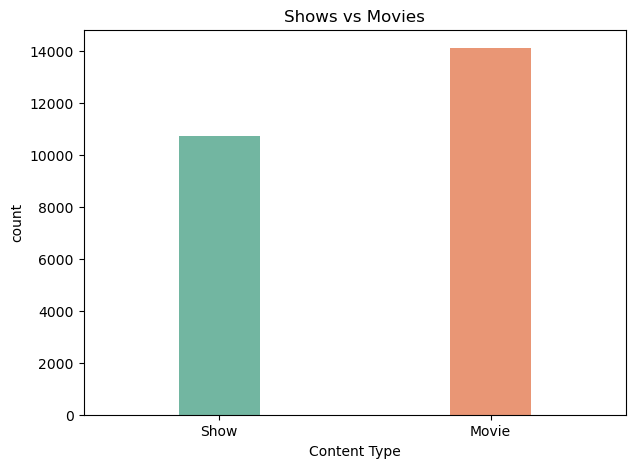

In [6]:
#Number of shows and movies
plt.figure(figsize=(7,5))
sns.countplot(x="Content Type",data=data,color='skyblue',width=0.3,palette='Set2')
plt.title("Shows vs Movies")
plt.show()

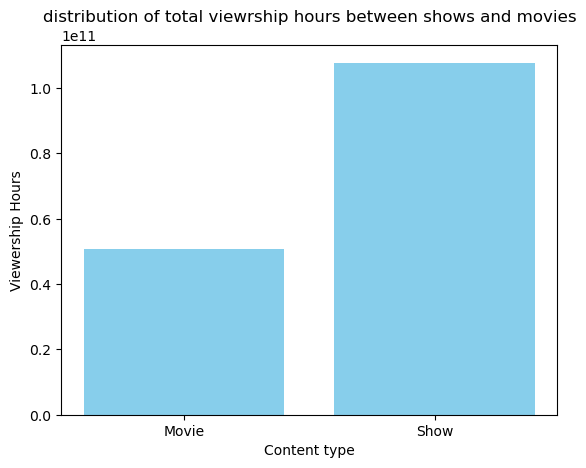

In [7]:
#distribution of total viewrship hours between shows and movies
viewed_hours=data.groupby("Content Type")['Hours Viewed'].sum()
y=viewed_hours.index
z=viewed_hours.values
plt.bar(y,z,color='skyblue')
plt.title("distribution of total viewrship hours between shows and movies")
plt.xlabel("Content type")
plt.ylabel("Viewership Hours")
plt.show()

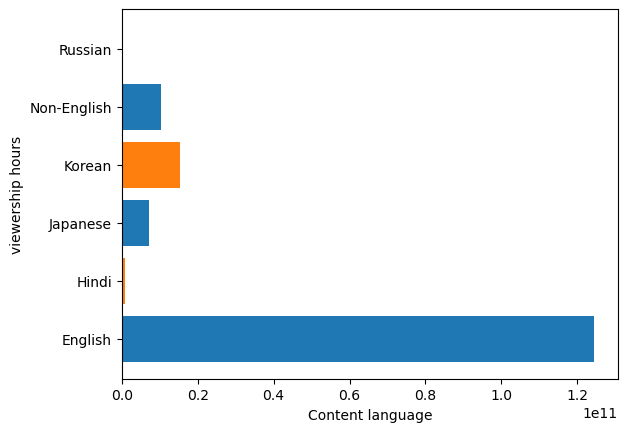

In [8]:
#aggregate viewership hours by language
data.head()
hou_lang=data.groupby('Language Indicator')['Hours Viewed'].sum()
x=hou_lang.index
y=hou_lang.values
colors=['tab:blue','tab:orange']
plt.barh(x,y,color=colors)
plt.xlabel("Content language")
plt.ylabel('viewership hours')
plt.show()

The visualization reveals that English-language content significantly dominates Netflix’s viewership, followed by other languages like Korean.

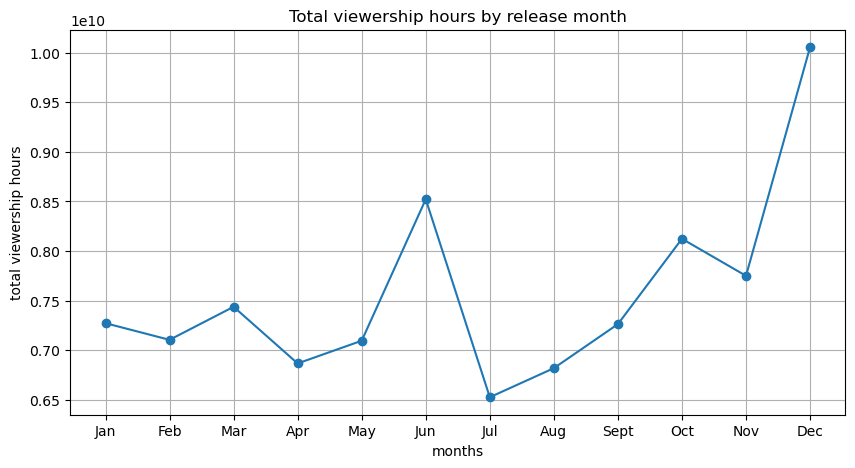

In [9]:
# how viewership varies based on release dates to identify any trends over time, such as seasonality or patterns around specific months

data.head()
data["Release Date"]=pd.to_datetime(data["Release Date"],errors='coerce')
data["month"]=data["Release Date"].dt.month
x=data.groupby('month')['Hours Viewed'].sum()
plt.figure(figsize=(10,5))
plt.plot(x.index,x.values,marker='o')
plt.xlabel('months')
plt.ylabel('total viewership hours')
plt.title('Total viewership hours by release month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar',"Apr",'May',"Jun",'Jul',"Aug",'Sept','Oct','Nov','Dec'])
plt.grid()
plt.show()

The above graph reveals a notable increase in viewership during June and a sharp rise toward the end of the year in December. It suggests that Netflix experiences spikes in audience engagement during these periods, possibly due to strategic content releases, holidays while the middle months have a steady but lower viewership pattern.

In [10]:
#  most successful content (both shows and movies) 
top_10 = data.nlargest(10,"Hours Viewed")
top_10


,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,month
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,3.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,1.0
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000.0,Korean,Movie,6.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,12.0
18214,ONE PIECE: Season 1,Yes,2023-08-31,541900000.0,English,Show,8.0
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show,11.0
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie,5.0
5,You: Season 4,Yes,2023-02-09,440600000.0,English,Show,2.0
6,La Reina del Sur: Season 3,No,2022-12-30,429600000.0,English,Show,12.0
7,Outer Banks: Season 3,Yes,2023-02-23,402500000.0,English,Show,2.0


English-language shows dominate the top  viewership spots. But, Korean content also has a notable presence in the top titles, which indicates its global popularity

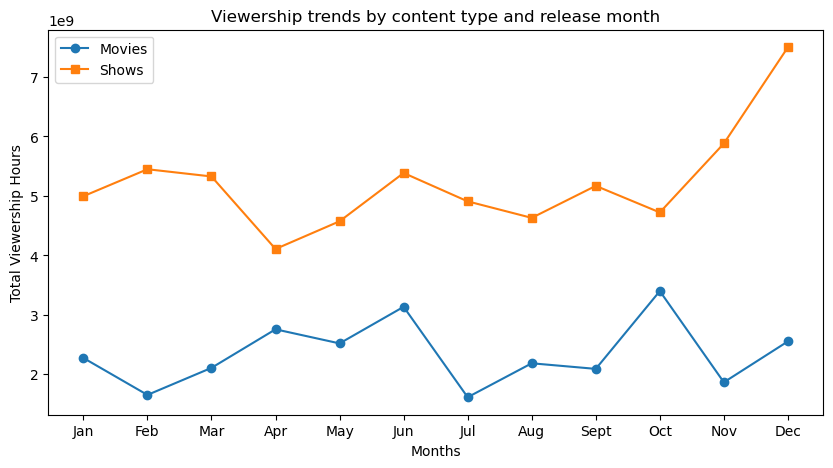

In [11]:
m=data.groupby(['month','Content Type'])['Hours Viewed'].sum().unstack()
plt.figure(figsize=(10,5))
plt.plot(m.index,m['Movie'],marker='o',label="Movies")
plt.plot(m.index,m["Show"],marker='s',label='Shows')
plt.xlabel('Months')
plt.ylabel('Total Viewership Hours')
plt.title('Viewership trends by content type and release month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar',"Apr",'May',"Jun",'Jul',"Aug",'Sept','Oct','Nov','Dec'])
plt.legend()
plt.show()

It shows that shows consistently have higher viewership than movies, peaking in December. Movies have more fluctuating viewership, with notable increases in June and October. This indicates that Netflix’s audience engages more with shows across the year, while movie viewership experiences occasional spikes, possibly linked to specific releases or events.

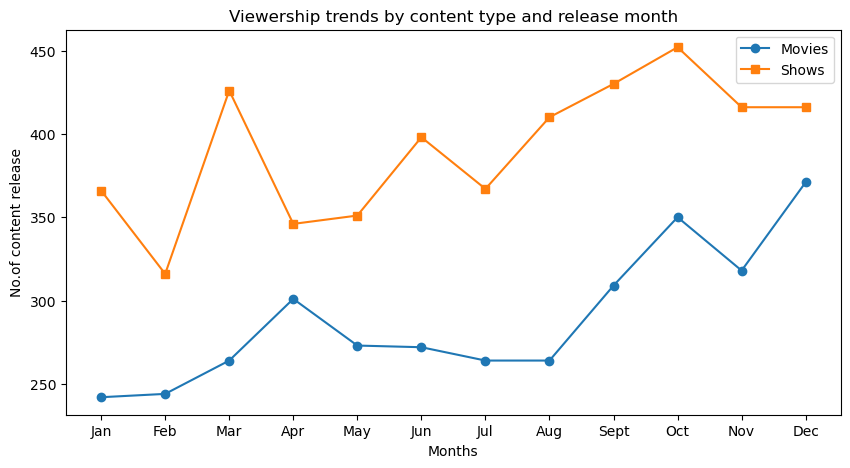

In [12]:
df=data.groupby(['month','Content Type'])['month'].count().unstack()
plt.figure(figsize=(10,5))
plt.plot(df.index,df['Movie'],marker='o',label="Movies")
plt.plot(df.index,df["Show"],marker='s',label='Shows')
plt.xlabel('Months')
plt.ylabel('No.of content release')
plt.title('Viewership trends by content type and release month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar',"Apr",'May',"Jun",'Jul',"Aug",'Sept','Oct','Nov','Dec'])
plt.legend()
plt.show()

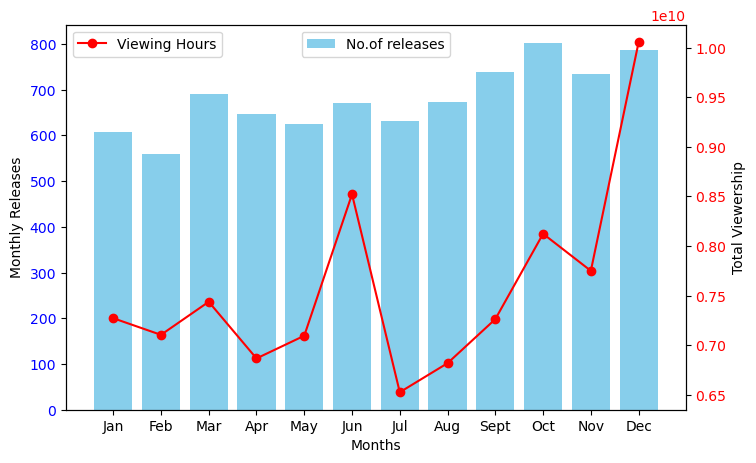

In [13]:
x=data.groupby('month')['Hours Viewed'].sum()
monthly_rel=data.groupby('month').size()

fig,ax1=plt.subplots(figsize=(8,5))

ax1.bar(x.index,monthly_rel.values,color='skyblue',label='No.of releases')
ax1.set_xlabel('Months')
ax1.set_ylabel('Monthly Releases')
ax1.tick_params(axis='y', labelcolor='blue')

ax2=ax1.twinx()

ax2.plot(x.index,x.values,color='red',marker='o',label='Viewing Hours')
ax2.set_ylabel('Total Viewership')
ax2.tick_params(axis='y', labelcolor='red')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar',"Apr",'May',"Jun",'Jul',"Aug",'Sept','Oct','Nov','Dec'])

ax1.legend(loc='upper center')
ax2.legend(loc='upper left')

plt.show()

While the number of releases is relatively steady throughout the year, viewership hours experience a sharp increase in June and a significant rise in December, despite a stable release count. This indicates that viewership is not solely dependent on the number of releases but influenced by the timing and appeal of specific content during these months.

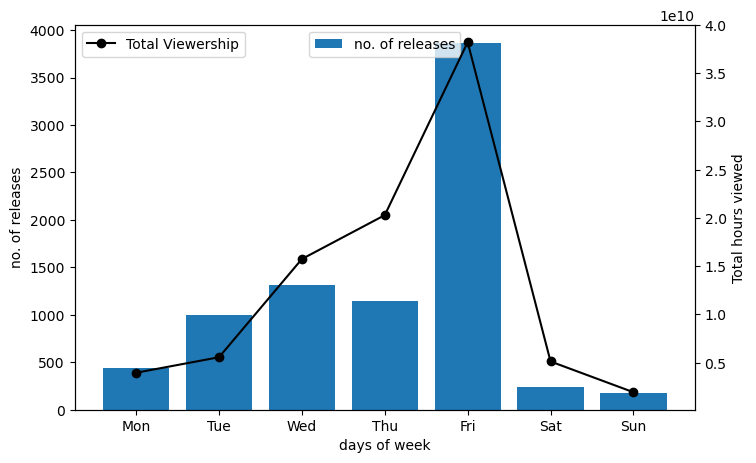

In [14]:

data['day']=data['Release Date'].dt.dayofweek
day_hou=data.groupby('day')['Hours Viewed'].sum()
day_rel=data.groupby('day').size()

fig,ax3=plt.subplots(figsize=(8,5))

ax3.bar(day_rel.index,day_rel.values,label='no. of releases')
ax3.set_xlabel('days of week')
ax3.set_ylabel('no. of releases')

ax4=ax3.twinx()

ax4.plot(day_hou.index,day_hou.values,label='Total Viewership',color='black',marker='o')
ax4.set_ylabel('Total hours viewed')

plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax3.legend(loc='upper center')
ax4.legend(loc='upper left')

plt.show()


The graph highlights that most content releases occur on Fridays, with viewership hours also peaking significantly on that day. This suggests that Netflix strategically releases content toward the weekend to maximize audience engagement. The viewership drops sharply on Saturdays and Sundays, despite some releases, indicating that the audience tends to consume newly released content right at the start of the weekend, which makes Friday the most impactful day for both releases and viewership.

In [15]:
df=data.groupby(['month','Content Type'])['month'].count().unstack()
df

Content Type,Movie,Show
month,,
1.0,242,366
2.0,244,316
3.0,264,426
4.0,301,346
5.0,273,351
6.0,272,398
7.0,264,367
8.0,264,410
9.0,309,430
